In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# import metric
from keras.metrics import sparse_categorical_crossentropy
# metric
from keras.metrics import binary_crossentropy
# optimization method (Stochastic Gradient Descent (SGD))
from keras.optimizers import SGD
# optimization method 
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from zipfile import ZipFile
import cv2
import random
from tqdm import tqdm
from glob import glob
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from numpy import *
from PIL import Image

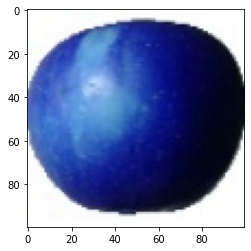

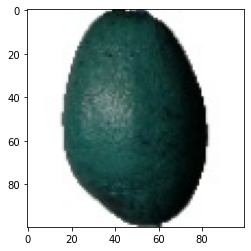

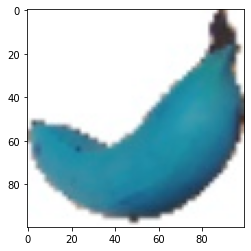

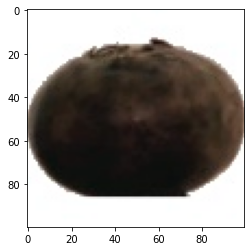

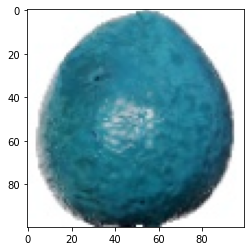

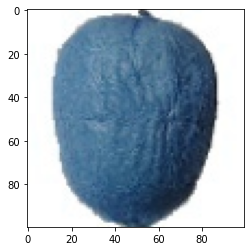

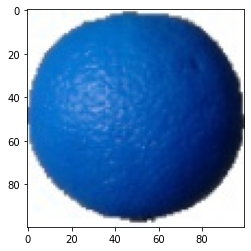

In [11]:
#loading images from path
DATADIR = 'D:/archivefruit/fruits-360_dataset/fruits-360/Training'
CATEGORIES = ["Apple Braeburn","Avocado","Banana","Blueberry","Guava","Kiwi","Orange"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #,cv2.IMREAD_GRAYSCALE
        plt.imshow(img_array)
        plt.show()
        break
   # break

In [12]:
#building our training data
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do fruits

        path = os.path.join(DATADIR,category)  # create path to fruits
        class_num = CATEGORIES.index(category)  # get the classification  (0 ,1,2,3,4,5,6) different number donate different category of fruit

        for img in tqdm(os.listdir(path)):  # iterate over each image per fruits
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass        

create_training_data()

image_count = len(training_data)

100%|██████████| 479/479 [00:00<00:00, 1812.99it/s]


In [13]:
print(image_count)

3306


In [14]:
#shuffle the dataset
random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])

2
2
5
0
2
4
0
6
0
2


In [16]:
IMG_SIZE = 100
batch_size = 128
img_height = 100
img_width = 100

In [17]:
#Assigning labels and features
X =[]
y =[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [18]:
#creating own model
#Normalising X and converting labels to categorical data
X = X.astype('float32')
X /= 255
Y = np_utils.to_categorical(y,7)
print(Y[100])
print(shape(Y))

[0. 1. 0. 0. 0. 0. 0.]
(3306, 7)


In [19]:
X = np.array(X)
print(type(X))

<class 'numpy.ndarray'>


In [20]:
y=np.array(y)
print(type(y))

<class 'numpy.ndarray'>


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [22]:
#define compare and train the CNN model
batch_size = 128
nb_classes =7
nb_epochs = 10
img_rows, img_columns = 100, 100
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [23]:

def Alexnet():
    
    # Initialize the model
    model = Sequential()

    # layer 1: convolutional layer + max-pooling layer
    model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (100,100,1)))
    model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

    # layer 2: convolutional layer + max-pooling layer 
    model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

    # layers 3-5: three convolutional layers + 1 max-pooling layer
    model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

    # layers 6 - 8: two fully connected hidden layers and one fully connected output layer
    model.add(Dense(4096, activation = 'relu',input_dim=4))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation = 'softmax'))

    # compile the model with a loss funciton, a metric and optimizer method for estimating the loss function
    opt = SGD(lr = 0.1)
    model.compile(loss = sparse_categorical_crossentropy,optimizer = opt,metrics = ['accuracy'])
    return model


In [25]:
Alexnet_model = Alexnet()
Alexnet_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 23, 23, 96)        11712     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 384)        

In [26]:

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  datagen = ImageDataGenerator(rotation_range = 5, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
  # iteration on the training set
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  # path to save the checkpoint 
  path_cp = os.getcwd() + '/' + 'weights_.hdf5'
  checkpoint_ = ModelCheckpoint(path_cp, monitor = 'loss', save_best_only = True, mode = 'auto')
  steps = X_train.shape[0]//batch_size
  # Fitting the model
  history = model.fit(it_train, epochs = epochs, steps_per_epoch = steps, validation_data = (X_test, y_test), verbose = 1, callbacks = checkpoint_)
  # Evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  
  return history, acc

train_history, acc = train_model(Alexnet_model, X_train, y_train, X_test, y_test, batch_size = 32, epochs = 10)

Epoch 1/5
18/18 [==============================] - 90s 5s/step - loss: 6.1667 - accuracy: 0.1432 - val_loss: 4.2601 - val_accuracy: 0.1552
Epoch 2/5
18/18 [==============================] - 85s 5s/step - loss: 2.9459 - accuracy: 0.1290 - val_loss: 2.0317 - val_accuracy: 0.1321
Epoch 3/5
18/18 [==============================] - 84s 5s/step - loss: 2.0996 - accuracy: 0.1500 - val_loss: 2.0189 - val_accuracy: 0.1542
Epoch 4/5
18/18 [==============================] - 86s 5s/step - loss: 2.0749 - accuracy: 0.1377 - val_loss: 2.0019 - val_accuracy: 0.1321
Epoch 5/5
31/31 [==============================] - 14s 436ms/step - loss: 2.0047 - accuracy: 0.1542
15.423


In [27]:
import pandas as pd

# convert the history.history to a pandas DataFrame:     
train_hist_df = pd.DataFrame(train_history.history) 

train_dict = {'train_hist': train_hist_df, 'acc': acc}
np.save('train_dict.npy', train_dict) 

In [28]:
Alexnet_model.save('Alexnet_model.h5')

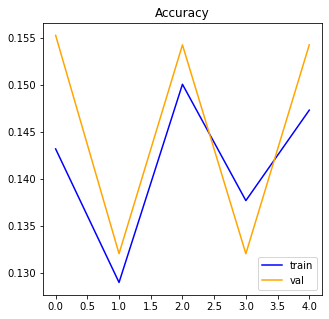

In [35]:

def plot_accuracy(history):
  plt.figure(figsize = (5,5))
  plt.plot(history .history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()
  
plot_accuracy(train_history)

In [53]:
#Accuracy and Score of model
score = Alexnet_model.evaluate(X_test, y_test, verbose = 1 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1]*100,'%')

31/31 [==============================] - 6s 187ms/step - loss: 2.0047 - accuracy: 0.1542
Test Score:  2.004748821258545
Test accuracy:  15.423387289047241 %


In [43]:
#observing its classification report and confusion matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#predict
y_pred=Alexnet_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_pred,y_test))

31/31 [==============================] - 8s 246ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.15      0.27       992
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.15       992
   macro avg       0.14      0.02      0.04       992
weighted avg       1.00      0.15      0.27       992



C:\Users\divya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print(confusion_matrix(y_pred,y_test))

[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [131 118 153 134 153 149 154]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


In [ ]:
#get classification report
print(classification_report(y_pred,y_test))

In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,y_test))

Text(69.0, 0.5, 'True classes')

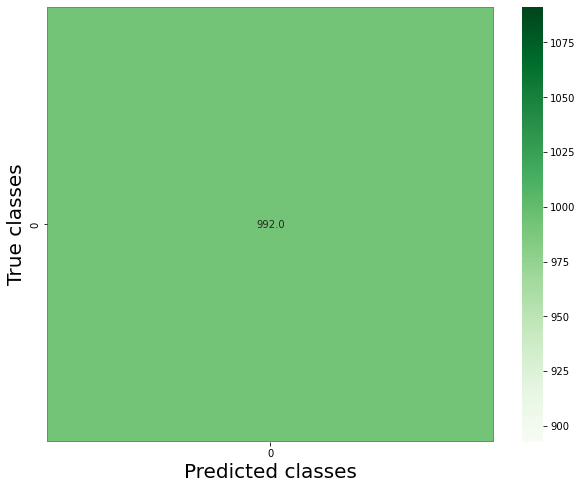

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# Reverse the true and the predicted labels into the original binary 
# labels (0 and 1) to compute the confusion matrix
y_test_labels = [np.argmax(vect) for vect in y_test]
y_test_pred_labels = [np.argmax(vect) for vect in y_test_labels]

conf_mat = confusion_matrix(y_test_labels, y_test_pred_labels)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

1/1 [==============================] - 0s 112ms/step


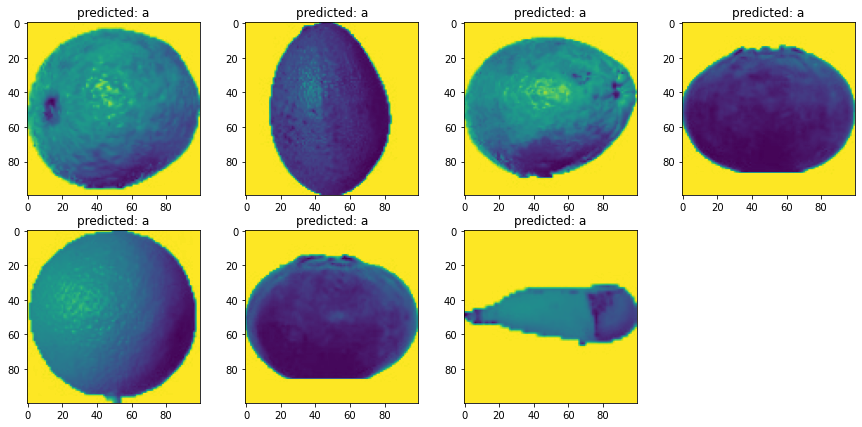

In [50]:
plt.figure(figsize = (15,7))
for i in np.arange(7):
  # take randomly an indice
  ind = random.randint(0, len(X_test))
  img = X_test[ind]
  # reshape the image 
  img_rs = img.reshape(1,100,100,1)
  # predict the label of img
  y_pred = Alexnet_model.predict(img_rs)
  # determine the corresponding category
  predicted_cate = category[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate))